# BUSINESS UNDERSTANDING

---

Memprediksi harga rumah secara akurat bisa menjadi tugas yang menakutkan. Pembeli hanya tidak peduli dengan ukuran (kaki persegi) rumah dan ada berbagai faktor lain yang memainkan peran kunci untuk menentukan harga rumah/properti.

# DATA UNDERSTANDING

---



## Data loading

In [ ]:
# LIBRARY

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# IDENTIFY DATA

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [ ]:
# DOWNLOAD DATA

!kaggle datasets download -d saipavansaketh/pune-house-data

  0% 0.00/391k [00:00<?, ?B/s]
100% 391k/391k [00:00<00:00, 64.5MB/s]


In [ ]:
# UNZIP DATA

from zipfile import ZipFile,os
file_name = "/content/pune-house-data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall('/content/temp/')
  print('Done')

Done


In [ ]:
# LOAD THE DATASET

base_dir = '/content/temp/Delhi house data.csv'
df = pd.read_csv(base_dir)
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


## Exploratory Data Analysis

#### Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


#### Menangani Missing Value dan Outliers

In [ ]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

Diasumsikan bahwa :
1. Fushising, Type, dan Per_Sqft harus terdefinisi
2. Terdapat kemungkinan bahwa TIDAK memiliki bathroom dan, Parking
3. Kolom Locality/alamat tidak diperlukan karena bukan kategori

In [ ]:
# DROP Nan and Column

df = df.dropna(subset=['Furnishing', 'Type', 'Per_Sqft']) # Menghapus value yang NaN sesuai asumsi (1)
df[['Bathroom', 'Parking']] = df[['Bathroom', 'Parking']].fillna(0) #Mengubah nilai Nan menjadi 0 sesuai asumsi (2)
del df['Locality'] # Menghapus kolom sesuai asumsi (3)

# df = df.dropna() # Delete NaN
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(1014, 10)

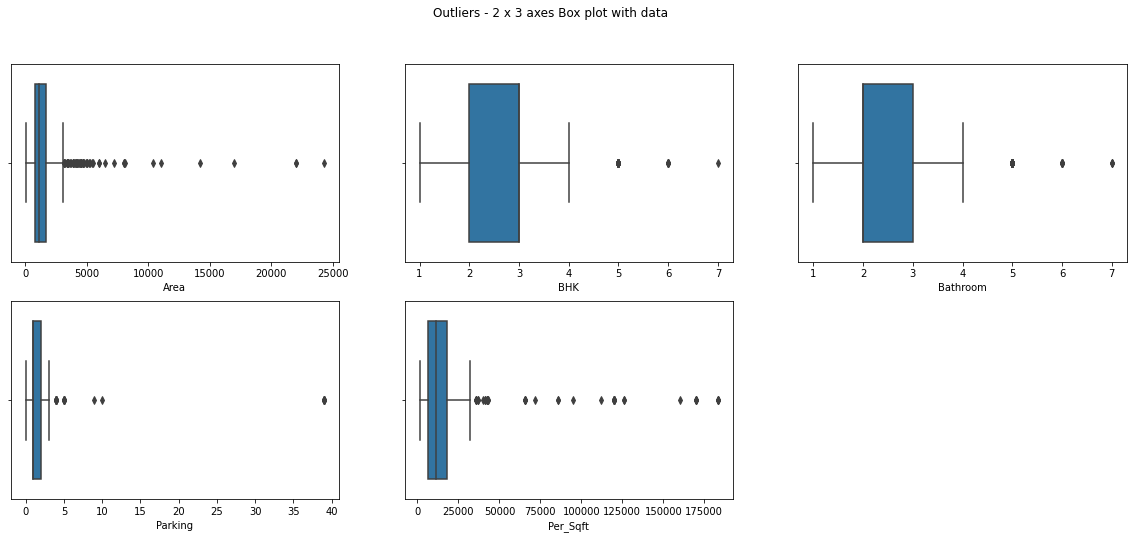

In [ ]:
# VISUALISAZI OUTLIERS

fig, axes = plt.subplots(2, 3, figsize = (20,8))
 
fig.suptitle('Outliers - 2 x 3 axes Box plot with data')
sns.boxplot(ax=axes[0][0], data=df, x='Area')
sns.boxplot(ax=axes[0][1], data=df, x='BHK')
sns.boxplot(ax=axes[0][2], data=df, x='Bathroom')
sns.boxplot(ax=axes[1][0], data=df, x='Parking')
sns.boxplot(ax=axes[1][1], data=df, x='Per_Sqft')
axes[1][2].remove()

Terlihat bahwa masih banyak titik-titik yang menjauhi bar yang berarti masih banyak nilai-nilai yang didefinisikan jauh dari rata-rata nilai seharusnya

In [ ]:
# DROP OUTLIERS

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah drop outliers
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(841, 10)

#### Univariate Analysis

In [ ]:
numerical_features = ['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft']
categorical_features = ['Furnishing', 'Status', 'Transaction', 'Type']

                jumlah sampel  persentase
Semi-Furnished            472        56.1
Unfurnished               254        30.2
Furnished                 115        13.7


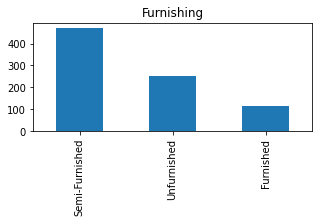

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, figsize=(5,2));

Pada diagram diatas terlihat bahwa properti yang terdata masih banyak menggunakan tipe Semi-Furnishing dibandingkan tipe yang lainnya.

               jumlah sampel  persentase
Ready_to_move            794        94.4
Almost_ready              47         5.6


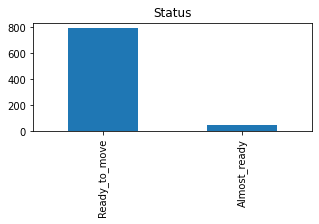

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, figsize=(5,2));

Pada diagram diatas terlihat bahwa properti yang terdata masih banyak menggunakan berstatus 'siap untuk pindah' dibandingkan 'selalu-siap'.

              jumlah sampel  persentase
Resale                  531        63.1
New_Property            310        36.9


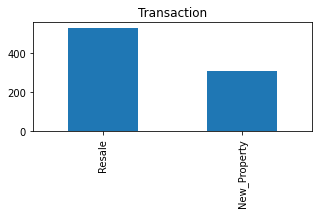

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature, figsize=(5,2));

Pada diagram diatas terlihat bahwa properti yang terdata masih banyak menggunakan transaksi dari properti yang dijual kembali dibandingkan pproperti yang masih baru.

               jumlah sampel  persentase
Builder_Floor            433        51.5
Apartment                408        48.5


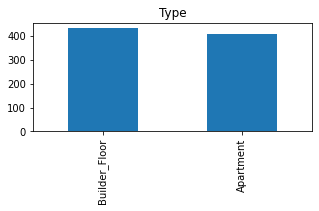

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df3 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df3)
count.plot(kind='bar', title=feature, figsize=(5,2));

Pada diagram diatas terlihat bahwa properti yang terdata masih banyak menggunakan tipe properti bangunan dibandingkan apartemen

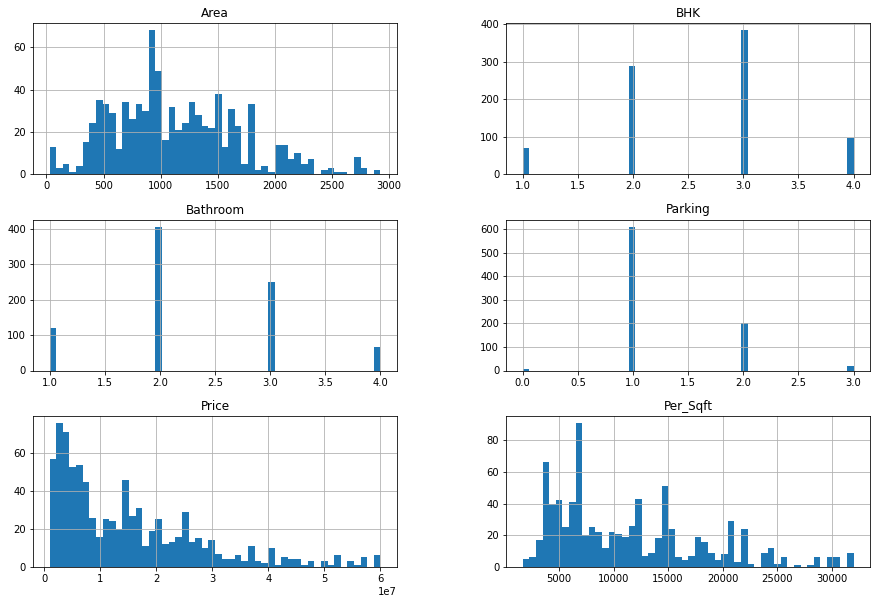

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

#### Multivariate Analysis

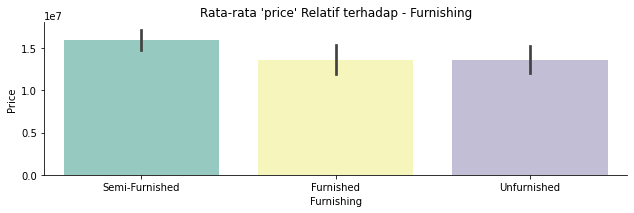

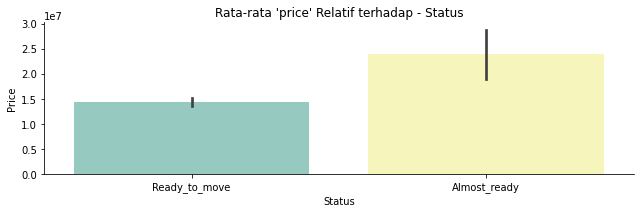

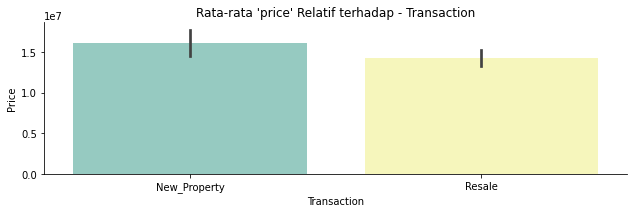

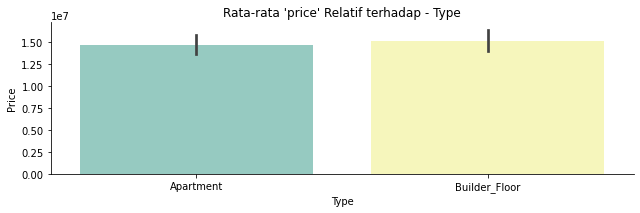

In [ ]:
at_features = df.select_dtypes(include='object').columns.to_list()
 
for col in categorical_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 3, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

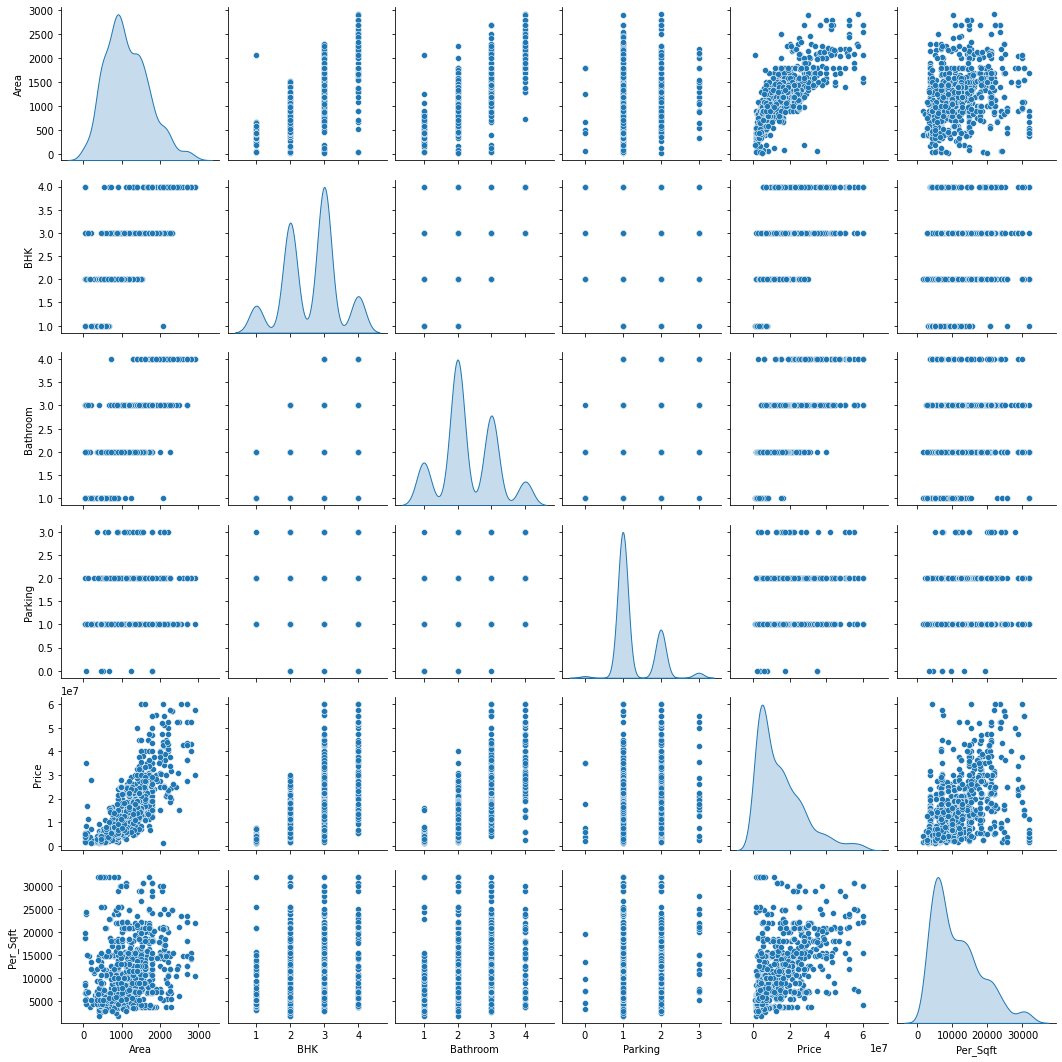

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

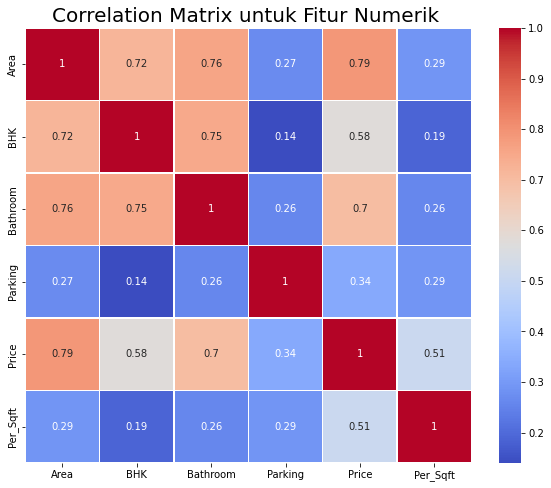

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Pada fungsi target 'Price', nilai korelasi terlemah jatuh pada 'Parking'. Sehingga data parking tidak diperlukan dalam melakukan prediksi

In [ ]:
df.drop(['Parking'], inplace=True, axis=1)
df.head()

,Area,BHK,Bathroom,Furnishing,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


# DATA PREPARATION

---


## Encoding Fitur Kategori

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Furnishing'], prefix='Furnishing')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Status'], prefix='Status')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Transaction'], prefix='Transaction')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Type'], prefix='Type')],axis=1)
df.drop(['Furnishing', 'Status', 'Transaction', 'Type'], axis=1, inplace=True)
df.head()

,Area,BHK,Bathroom,Price,Per_Sqft,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
1,750.0,2,2.0,5000000,6667.0,0,1,0,0,1,1,0,1,0
2,950.0,2,2.0,15500000,6667.0,1,0,0,0,1,0,1,1,0
3,600.0,2,2.0,4200000,6667.0,0,1,0,0,1,0,1,0,1
4,650.0,2,2.0,6200000,6667.0,0,1,0,0,1,1,0,0,1
5,1300.0,4,3.0,15500000,6667.0,0,1,0,0,1,1,0,0,1


## Reduksi Dimensi dengan PCA

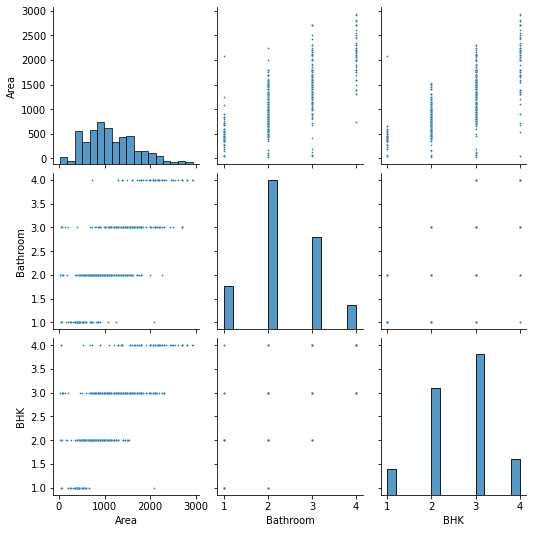

In [ ]:
sns.pairplot(df[['Area','Bathroom', 'BHK']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Area','Bathroom', 'BHK']])
df['dimension'] = pca.transform(df.loc[:, ('Area','Bathroom', 'BHK')]).flatten()
df.drop(['Area','Bathroom', 'BHK'], axis=1, inplace=True)

In [ ]:
df.head()

,Price,Per_Sqft,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor,dimension
1,5000000,6667.0,0,1,0,0,1,1,0,1,0,-385.543283
2,15500000,6667.0,1,0,0,0,1,0,1,1,0,-185.543509
3,4200000,6667.0,0,1,0,0,1,0,1,0,1,-535.543113
4,6200000,6667.0,0,1,0,0,1,1,0,0,1,-485.543169
5,15500000,6667.0,0,1,0,0,1,1,0,0,1,164.459252


## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["Price"],axis =1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 841
Total # of sample in train dataset: 756
Total # of sample in test dataset: 85


## Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['Per_Sqft']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Per_Sqft
1005,-0.170949
54,1.500784
337,-0.654149
1164,0.003381
62,-1.104143


In [ ]:
X_train[numerical_features].describe().round(4)

,Per_Sqft
count,756.0000
mean,0.0000
std,1.0007
min,-1.4094
25%,-0.7734
50%,-0.2613
75%,0.5516
max,2.9321


# MODELING

---

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

### Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# EVALUATION

---


In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,45534255453.703705,46204955600.0
RF,5001157055.742188,34875935451.53286
Boosting,35875352466.45713,41332920032.159309


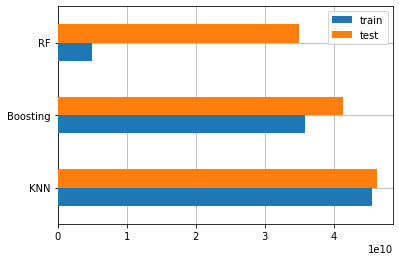

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### UJI DATA

In [ ]:
prediksi = X_test.iloc[1:2].copy()
# prediksi = X_test.sample().copy()
pred_dict = {'y_true':y_test[1:2]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
393,3300000,2775000.0,3188333.3,3624778.8
